# Decision Tree Model

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [189]:
# import some data to play with
company_data = pd.read_csv('Company_Data.csv')   

In [190]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [191]:
company_data.shape

(400, 11)

In [192]:
company_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [193]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [194]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [195]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [196]:
company_data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [197]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [198]:
# Convert 'Sale' variable to categorical
def categorize_sales(Sales):
    if Sales <= 6:
        return 'Low'
    elif Sales <= 12:
        return 'Medium'
    else:
        return 'High'

company_data['Sales_Category'] = company_data['Sales'].apply(categorize_sales)

In [199]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Medium
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [200]:
company_data['Sales_Category'].unique() 

array(['Medium', 'Low', 'High'], dtype=object)

In [201]:
company_data.Sales_Category.value_counts() 

Medium    243
Low       130
High       27
Name: Sales_Category, dtype: int64

In [202]:
# Drop the original 'Taxable.Income' column
company_data.drop(columns=['Sales'], axis = 1,inplace=True)

In [203]:
company_data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,Medium
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [204]:
company_data['Sales_Category'] = company_data['Sales_Category'].replace({'High': 2, 'Medium': 1, 'Low': 0})

In [18]:
company_data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,141,64,3,340,128,Bad,38,13,Yes,No,0


In [19]:
company_data.Sales_Category.value_counts() 

1    243
0    130
2     27
Name: Sales_Category, dtype: int64

In [20]:
company_data['ShelveLoc'] = company_data['ShelveLoc'].replace({'Good': 2, 'Medium': 1, 'Bad': 0})

In [21]:
company_data.ShelveLoc.value_counts() 

1    219
0     96
2     85
Name: ShelveLoc, dtype: int64

In [22]:
company_data['Urban'] = company_data['Urban'].replace({'Yes': 1, 'No': 0})

In [23]:
company_data['US'] = company_data['US'].replace({'Yes': 1, 'No': 0})

In [24]:
company_data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,2,65,10,1,1,1
2,113,35,10,269,80,1,59,12,1,1,1
3,117,100,4,466,97,1,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,0


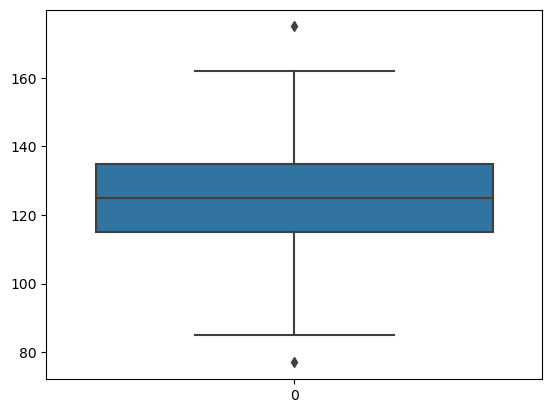

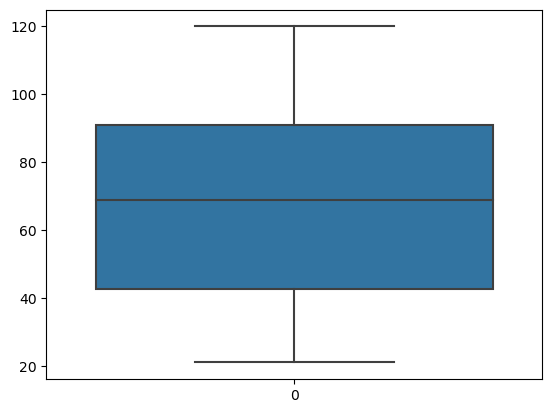

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=company_data['CompPrice'])
plt.show()

sns.boxplot(data=company_data['Income'])
plt.show()

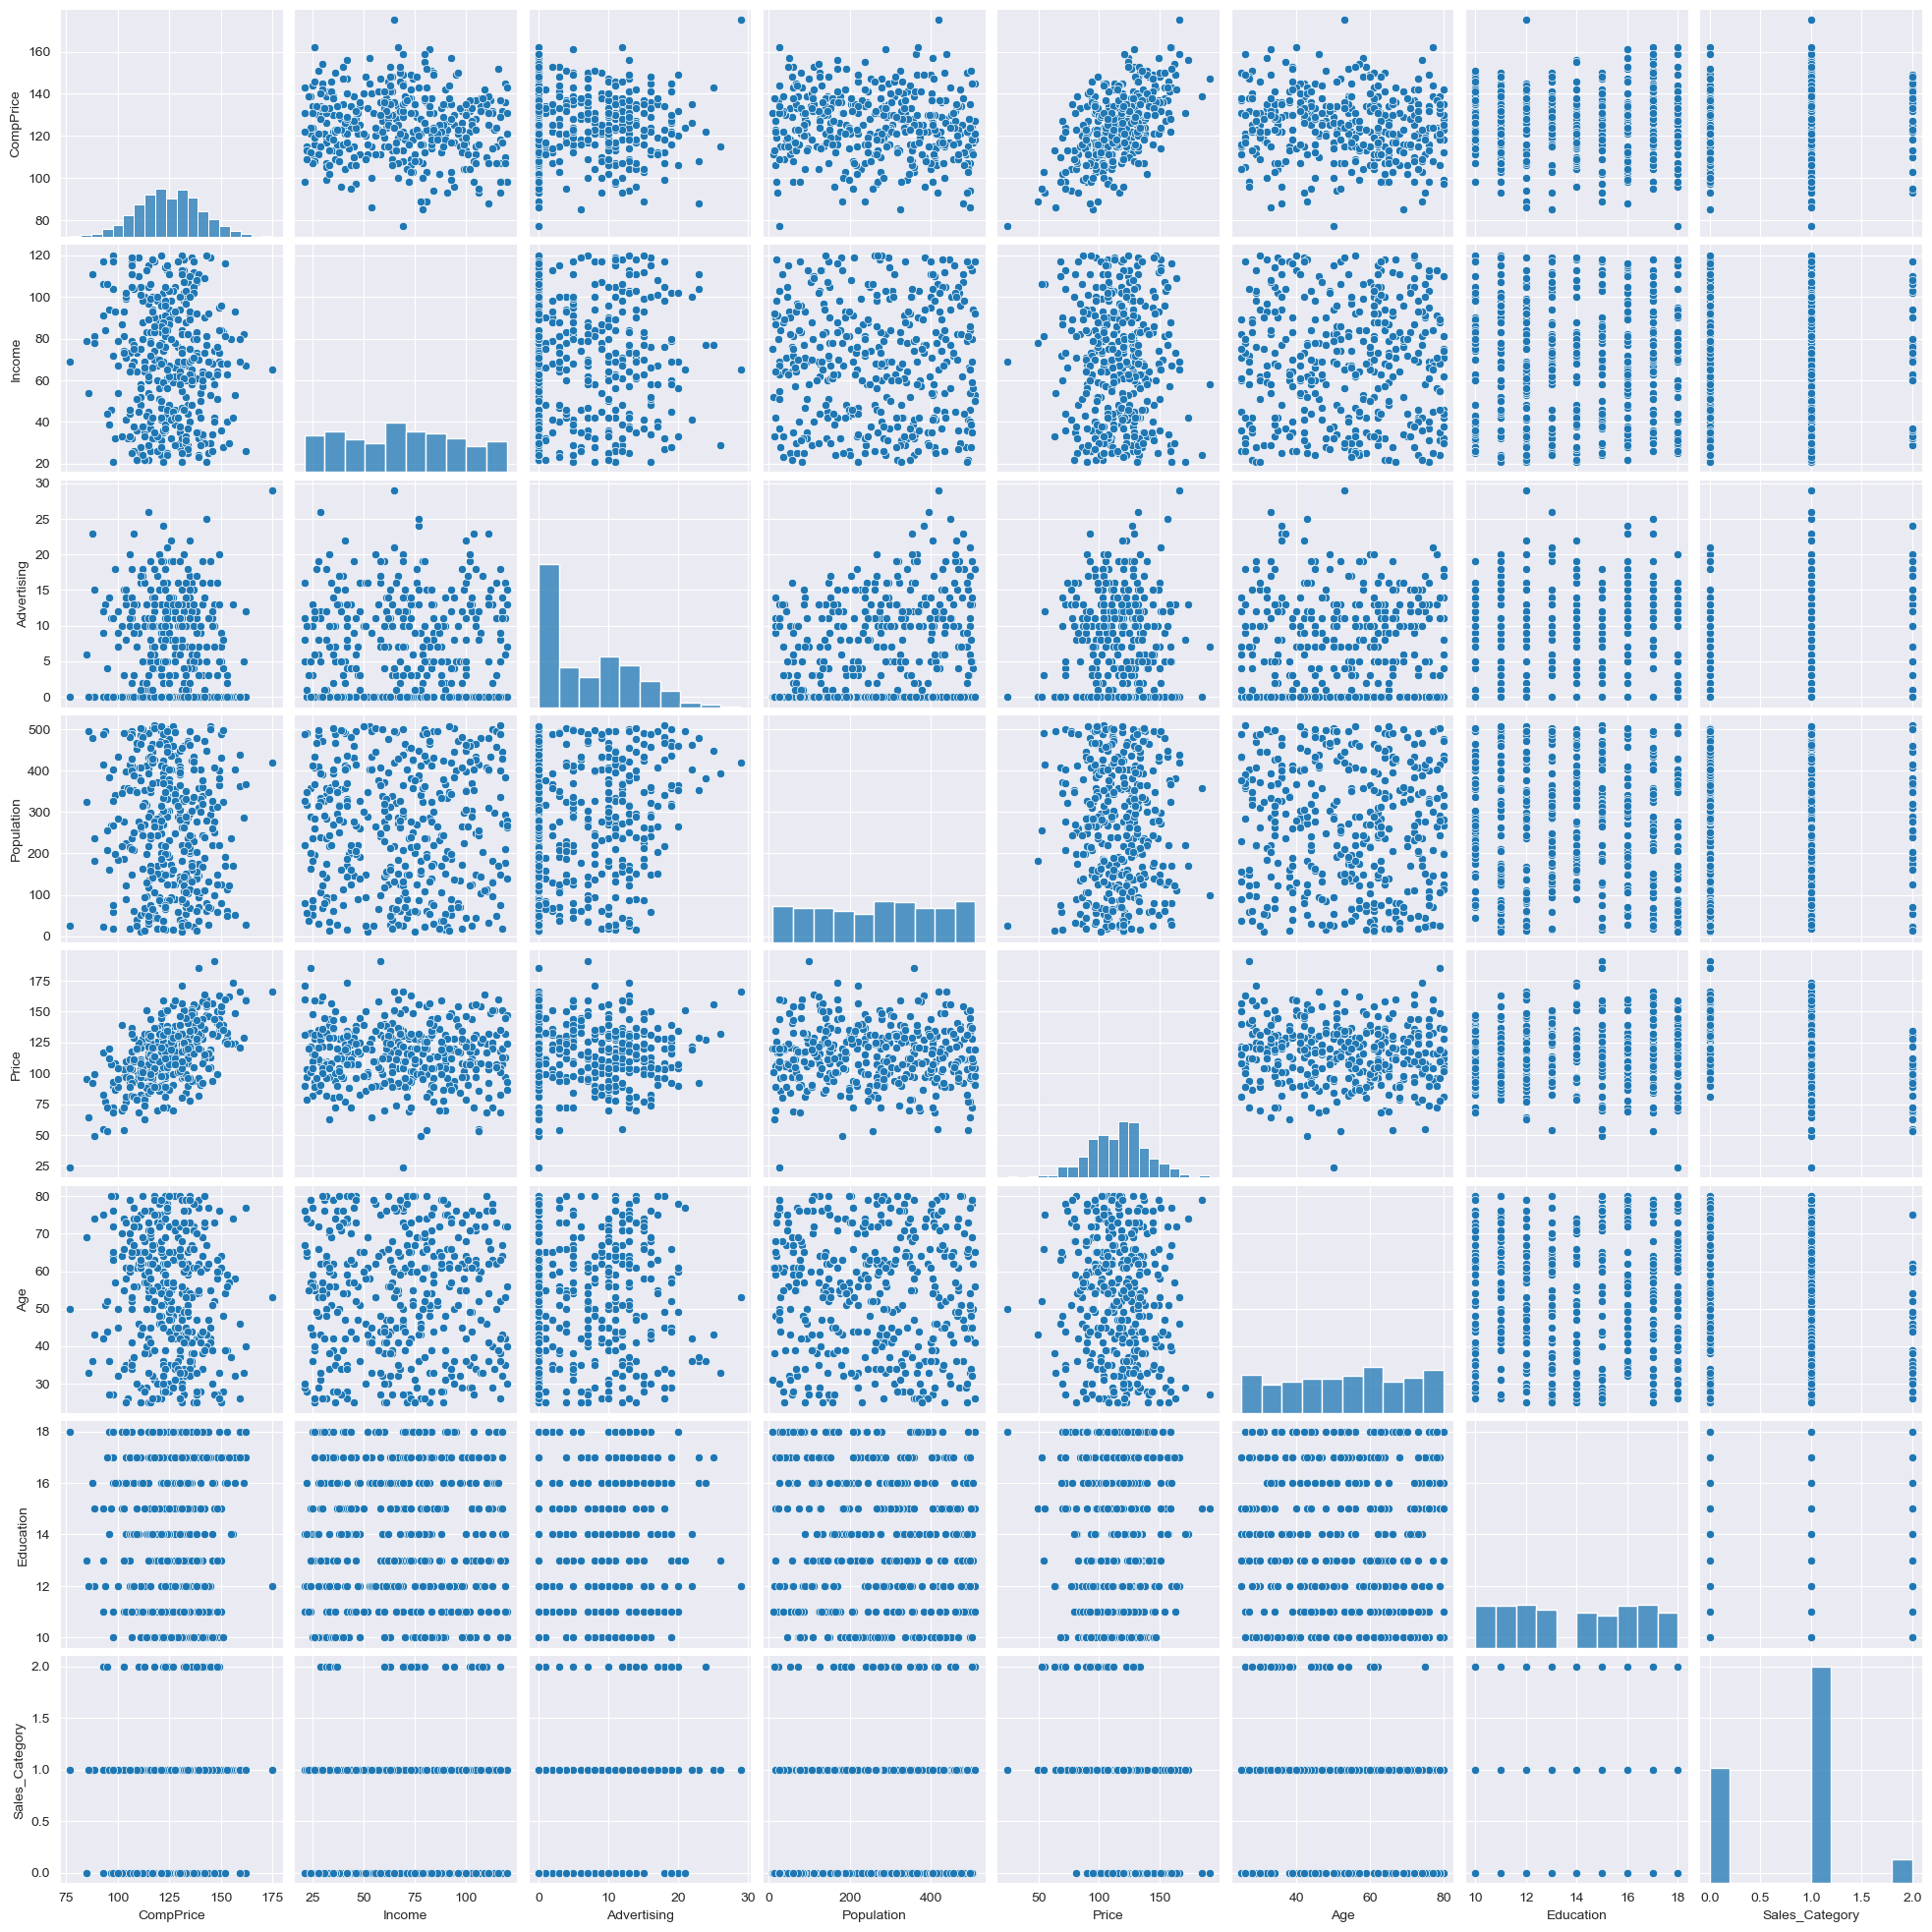

In [209]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(company_data)

In [26]:
# Split data into features and target variable
X = company_data.drop(columns=['Sales_Category'])
y =company_data['Sales_Category']

In [173]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42) 

In [174]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

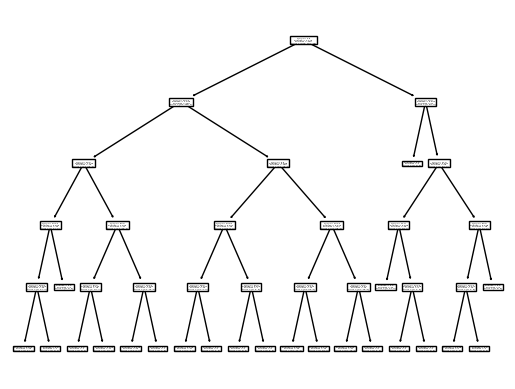

In [175]:
#PLot the decision tree
tree.plot_tree(model);

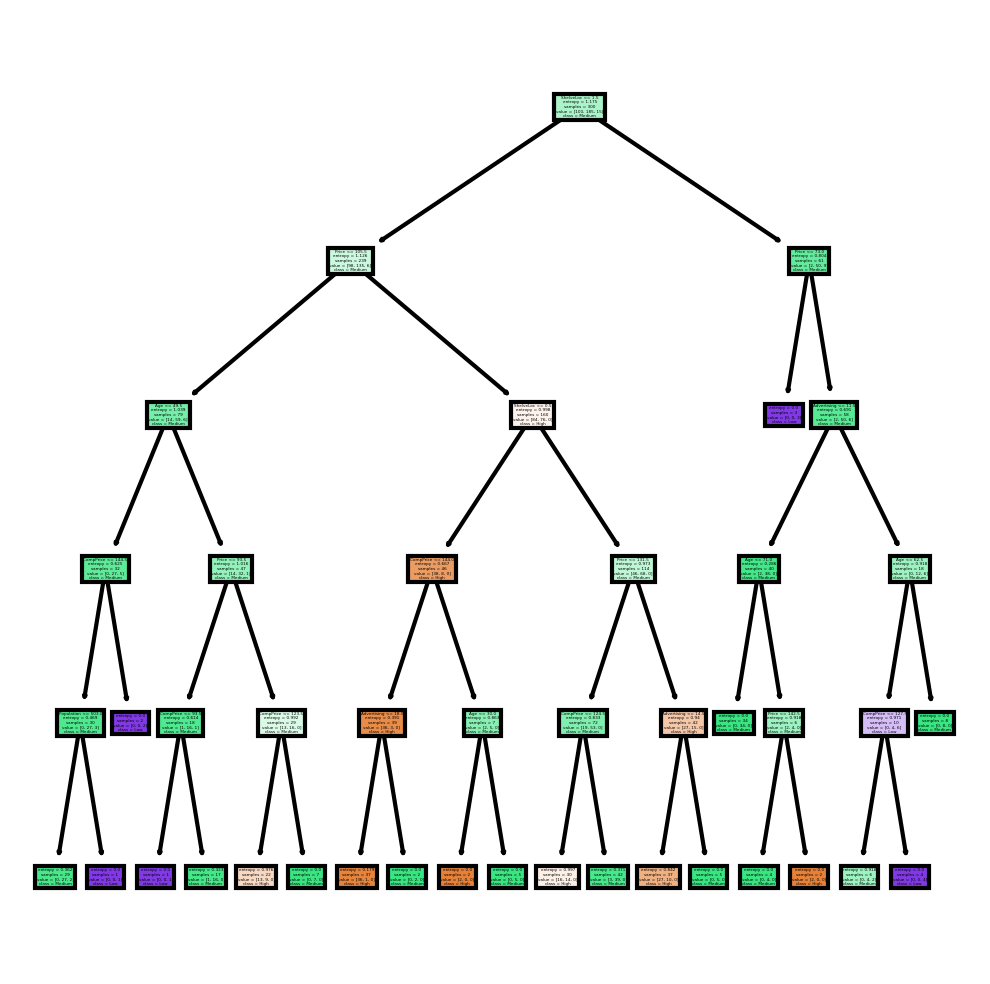

In [176]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','Sales_Category']
cn=['High', 'Medium','Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [177]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_5 <= 1.50
|   |--- feature_4 <= 105.50
|   |   |--- feature_6 <= 49.50
|   |   |   |--- feature_0 <= 144.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- feature_0 >  144.50
|   |   |   |   |--- class: 2
|   |   |--- feature_6 >  49.50
|   |   |   |--- feature_4 <= 93.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- feature_4 >  93.50
|   |   |   |   |--- truncated branch of depth 2
|   |--- feature_4 >  105.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- feature_0 <= 144.00
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- feature_0 >  144.00
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- feature_5 >  0.50
|   |   |   |--- feature_4 <= 131.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- feature_4 >  131.50
|   |   |   |   |--- truncated branch of depth 2
|--- feature_5 >  1.50
|   |--- feature_4 <= 73.00
|   |   |--- class: 2
|   |--- feature_4 >  73.00
|   |   |--- feature_2 <=

In [178]:
model.feature_importances_ 

array([0.20708993, 0.        , 0.12845576, 0.01579074, 0.27100988,
       0.23105579, 0.14659789, 0.        , 0.        , 0.        ])

In [179]:
import pandas as pd

# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a Pandas Series with feature importances and corresponding feature names
feature_imp = pd.Series(feature_importances, index=fn[:-1])  # Exclude the last item in fn, assuming it's the target variable

# Sort the Series by feature importances in descending order
feature_imp = feature_imp.sort_values(ascending=False)

# Display the sorted feature importances
print(feature_imp)

Price          0.271010
ShelveLoc      0.231056
CompPrice      0.207090
Age            0.146598
Advertising    0.128456
Population     0.015791
Income         0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64


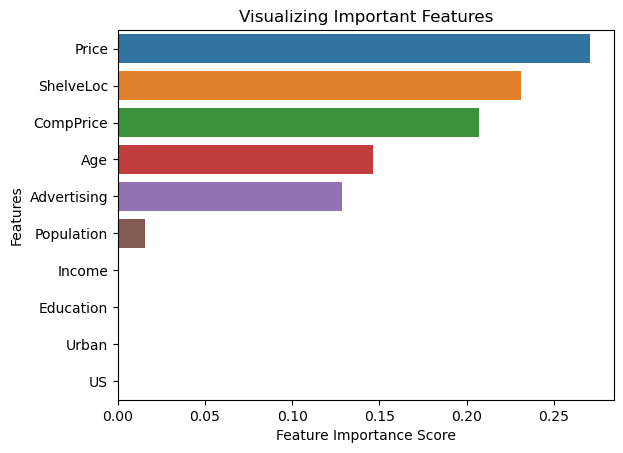

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [181]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

1    58
0    37
2     5
dtype: int64

In [182]:
preds 

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [183]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Sales_Category,,,
0,23,7,0
1,14,43,1
2,0,8,4


In [184]:
# Accuracy 
np.mean(preds==y_test)

0.7

In [185]:
# Evaluate model
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.77      0.69        30
           1       0.74      0.74      0.74        58
           2       0.80      0.33      0.47        12

    accuracy                           0.70       100
   macro avg       0.72      0.61      0.63       100
weighted avg       0.71      0.70      0.69       100



In [186]:
#Find the testing accuracy
model.score(x_test,y_test)

0.7

In [187]:
#Find the training accuracy
model.score(x_train, y_train)

0.86